
# Evaluation Metrics

Choosing the best model

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('df_concat.csv')

In [102]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Unnamed: 0
0,0.6110,0.3660,4,-10.890,0,0.2910,0.874,0.000515,0.0838,0.5930,146.052,audio_features,1ygVkGM0Uk0M7ULenlZGaf,spotify:track:1ygVkGM0Uk0M7ULenlZGaf,https://api.spotify.com/v1/tracks/1ygVkGM0Uk0M...,https://api.spotify.com/v1/audio-analysis/1ygV...,158173,4,NaN
1,0.5120,0.5110,2,-8.645,0,0.0300,0.662,0.000199,0.2090,0.5890,89.499,audio_features,6U03Orwr5Dxt8jahLnQpYV,spotify:track:6U03Orwr5Dxt8jahLnQpYV,https://api.spotify.com/v1/tracks/6U03Orwr5Dxt...,https://api.spotify.com/v1/audio-analysis/6U03...,179293,4,NaN
2,0.7970,0.3550,11,-14.592,0,0.0651,0.872,0.000057,0.0857,0.9610,87.574,audio_features,2MzS7IK7ZXuk48Btb3EDMy,spotify:track:2MzS7IK7ZXuk48Btb3EDMy,https://api.spotify.com/v1/tracks/2MzS7IK7ZXuk...,https://api.spotify.com/v1/audio-analysis/2MzS...,118805,4,NaN
3,0.4260,0.2310,2,-16.066,1,0.0359,0.740,0.000000,0.1720,0.6670,177.980,audio_features,4pSSmEzKzGo6ehVriMb77D,spotify:track:4pSSmEzKzGo6ehVriMb77D,https://api.spotify.com/v1/tracks/4pSSmEzKzGo6...,https://api.spotify.com/v1/audio-analysis/4pSS...,122044,4,NaN
4,0.5080,0.2790,6,-15.586,0,0.0384,0.783,0.000000,0.1400,0.7280,83.261,audio_features,3LhM43JzrSMUgTzs7wfn0u,spotify:track:3LhM43JzrSMUgTzs7wfn0u,https://api.spotify.com/v1/tracks/3LhM43JzrSMU...,https://api.spotify.com/v1/audio-analysis/3LhM...,116611,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,0.2400,0.0834,6,-29.545,0,0.0499,0.978,0.944000,0.0804,0.1880,169.621,audio_features,4VVEfBXep7FdOt524jkfLF,spotify:track:4VVEfBXep7FdOt524jkfLF,https://api.spotify.com/v1/tracks/4VVEfBXep7Fd...,https://api.spotify.com/v1/audio-analysis/4VVE...,159320,4,NaN
2686,0.4050,0.3180,9,-17.140,1,0.0565,0.938,0.723000,0.2840,0.3420,151.434,audio_features,7hOLwSaTSkrqxSMzj4bXI1,spotify:track:7hOLwSaTSkrqxSMzj4bXI1,https://api.spotify.com/v1/tracks/7hOLwSaTSkrq...,https://api.spotify.com/v1/audio-analysis/7hOL...,424653,4,NaN
2687,0.2910,0.0981,8,-23.156,1,0.0398,0.950,0.865000,0.2750,0.1940,138.168,audio_features,76i4IBw3KsuDw783tvHB0e,spotify:track:76i4IBw3KsuDw783tvHB0e,https://api.spotify.com/v1/tracks/76i4IBw3KsuD...,https://api.spotify.com/v1/audio-analysis/76i4...,249640,4,NaN
2688,0.0992,0.2260,9,-14.840,0,0.0339,0.937,0.903000,0.1830,0.0605,79.518,audio_features,53ann6bENp7BF8uklrzQAp,spotify:track:53ann6bENp7BF8uklrzQAp,https://api.spotify.com/v1/tracks/53ann6bENp7B...,https://api.spotify.com/v1/audio-analysis/53an...,256493,4,NaN


In [94]:
df["mode"].unique()

array([0, 1])

In [95]:
df["time_signature"].unique()

array([4, 3, 1, 5, 0])

In [103]:
df_af = df.drop(axis=1, columns=["mode", "type", "uri", "track_href", "analysis_url", "Unnamed: 0"], inplace=False, errors='raise')
df_af

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.6110,0.3660,4,-10.890,0.2910,0.874,0.000515,0.0838,0.5930,146.052,1ygVkGM0Uk0M7ULenlZGaf,158173,4
1,0.5120,0.5110,2,-8.645,0.0300,0.662,0.000199,0.2090,0.5890,89.499,6U03Orwr5Dxt8jahLnQpYV,179293,4
2,0.7970,0.3550,11,-14.592,0.0651,0.872,0.000057,0.0857,0.9610,87.574,2MzS7IK7ZXuk48Btb3EDMy,118805,4
3,0.4260,0.2310,2,-16.066,0.0359,0.740,0.000000,0.1720,0.6670,177.980,4pSSmEzKzGo6ehVriMb77D,122044,4
4,0.5080,0.2790,6,-15.586,0.0384,0.783,0.000000,0.1400,0.7280,83.261,3LhM43JzrSMUgTzs7wfn0u,116611,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,0.2400,0.0834,6,-29.545,0.0499,0.978,0.944000,0.0804,0.1880,169.621,4VVEfBXep7FdOt524jkfLF,159320,4
2686,0.4050,0.3180,9,-17.140,0.0565,0.938,0.723000,0.2840,0.3420,151.434,7hOLwSaTSkrqxSMzj4bXI1,424653,4
2687,0.2910,0.0981,8,-23.156,0.0398,0.950,0.865000,0.2750,0.1940,138.168,76i4IBw3KsuDw783tvHB0e,249640,4
2688,0.0992,0.2260,9,-14.840,0.0339,0.937,0.903000,0.1830,0.0605,79.518,53ann6bENp7BF8uklrzQAp,256493,4


In [106]:
#df_af.to_csv('df_af.csv', index=False)

In [107]:
X = df_af.drop(axis=1, columns=["id"], inplace=False, errors='raise')
X

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.6110,0.3660,4,-10.890,0.2910,0.874,0.000515,0.0838,0.5930,146.052,158173,4
1,0.5120,0.5110,2,-8.645,0.0300,0.662,0.000199,0.2090,0.5890,89.499,179293,4
2,0.7970,0.3550,11,-14.592,0.0651,0.872,0.000057,0.0857,0.9610,87.574,118805,4
3,0.4260,0.2310,2,-16.066,0.0359,0.740,0.000000,0.1720,0.6670,177.980,122044,4
4,0.5080,0.2790,6,-15.586,0.0384,0.783,0.000000,0.1400,0.7280,83.261,116611,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2685,0.2400,0.0834,6,-29.545,0.0499,0.978,0.944000,0.0804,0.1880,169.621,159320,4
2686,0.4050,0.3180,9,-17.140,0.0565,0.938,0.723000,0.2840,0.3420,151.434,424653,4
2687,0.2910,0.0981,8,-23.156,0.0398,0.950,0.865000,0.2750,0.1940,138.168,249640,4
2688,0.0992,0.2260,9,-14.840,0.0339,0.937,0.903000,0.1830,0.0605,79.518,256493,4


In [108]:
#Standardize the numerical features

std = StandardScaler()

X_scaled = std.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [109]:
std

StandardScaler()

In [110]:
X_scaled.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.034147,-1.087831,-0.333869,-0.469811,2.509800,1.784941,-0.402018,-0.656325,0.205743,0.855466,-0.558469,0.198716
1,-0.518101,-0.495848,-0.889974,-0.061501,-0.655962,1.115717,-0.403269,0.193065,0.190012,-1.089441,-0.425045,0.198716
2,1.071703,-1.132740,1.612497,-1.143113,-0.230221,1.778627,-0.403831,-0.643435,1.652987,-1.155643,-0.807172,0.198716
3,-0.997832,-1.638988,-0.889974,-1.411197,-0.584399,1.361941,-0.404057,-0.057953,0.496765,1.953498,-0.786710,0.198716
4,-0.540414,-1.443021,0.222235,-1.323897,-0.554075,1.497679,-0.404057,-0.275049,0.736661,-1.303971,-0.821032,0.198716


In [68]:
# Save the scaler as a pickle file:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(std, file)

# Load the scaler from the pickle file
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

In [69]:
scaler

StandardScaler()

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
import pickle

## K-Means

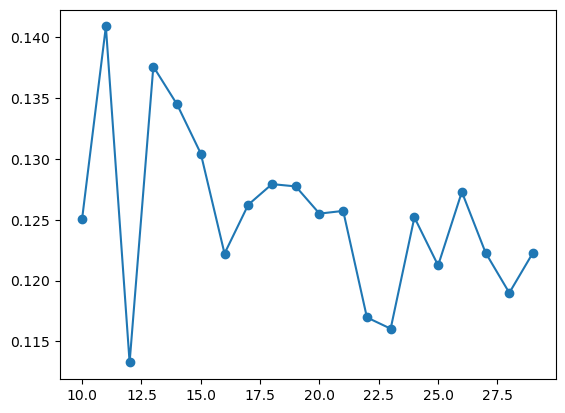

In [11]:
#K-Means
silhouette = []

for k in range(10,30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X_scaled)
    labels = kmeans.predict(X_scaled)
    silhouette.append(silhouette_score(X_scaled, labels))

import matplotlib.pyplot as plt

plt.plot(range(10,30), silhouette, marker = "o")

In [12]:
kmeans = KMeans(n_clusters = 10, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=10, random_state=0)

In [13]:
labels_km = kmeans.fit_predict(X_scaled)

### Silhouette Score

In [14]:
sil_score_kmeans = silhouette_score(X_scaled, labels_km)
print(f"Silhouette Score for KMeans: {sil_score_kmeans}")

Silhouette Score for KMeans: 0.14246060989811238


### Davies-Bouldin Index

In [15]:
db_score_km = davies_bouldin_score(X_scaled, labels_km)
print(f"Davies-Bouldin Index: {db_score_km}")

Davies-Bouldin Index: 1.4405011639425056


### Calinski-Harabasz Index

In [16]:
ch_score_km = calinski_harabasz_score(X_scaled, labels_km)
print(f"Calinski-Harabasz Index: {ch_score_km}")

Calinski-Harabasz Index: 350.00811838846215


## Hierarchical

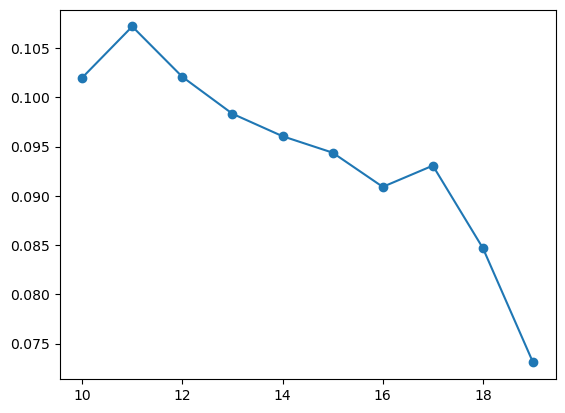

In [17]:
#Hierarchical

silhouette = []

for k in range(10,20):
    agglomerative = cluster.AgglomerativeClustering(n_clusters=k,linkage='ward')
    agglomerative.fit(X_scaled)
    labels = agglomerative.fit_predict(X_scaled)
    silhouette.append(silhouette_score(X_scaled, labels))

import matplotlib.pyplot as plt

plt.plot(range(10,20), silhouette, marker = "o")

In [18]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=11,linkage='ward')
labels_ward = agglomerative.fit_predict(X_scaled)

### Silhouette Score

In [19]:
sil_score_agg_ward = silhouette_score(X_scaled, labels_ward)
print(f"Silhouette Score for Agglomerative Ward: {sil_score_agg_ward}")

Silhouette Score for Agglomerative Ward: 0.10718010014635988


### Davies-Bouldin Index

In [20]:
db_score_ward = davies_bouldin_score(X_scaled, labels_ward)
print(f"Davies-Bouldin Index: {db_score_ward}")

Davies-Bouldin Index: 1.6805008944521007


### Calinski-Harabasz Index

In [21]:
ch_score_ward = calinski_harabasz_score(X_scaled, labels_ward)
print(f"Calinski-Harabasz Index: {ch_score_ward}")

Calinski-Harabasz Index: 289.45564650856977


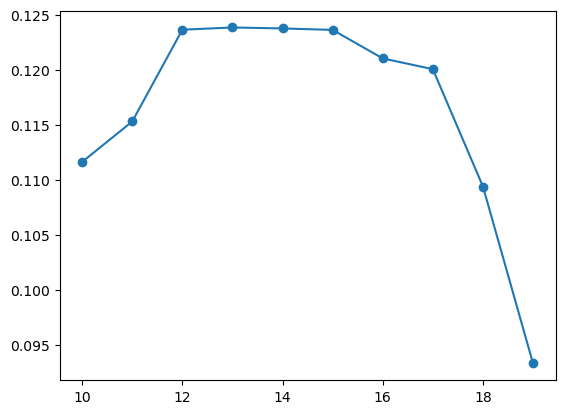

In [22]:
silhouette = []

for k in range(10,20):
    agglomerative = cluster.AgglomerativeClustering(n_clusters=k,linkage='complete')
    agglomerative.fit(X_scaled)
    labels = agglomerative.fit_predict(X_scaled)
    silhouette.append(silhouette_score(X_scaled, labels))

import matplotlib.pyplot as plt

plt.plot(range(10,20), silhouette, marker = "o")

### Silhouette Score

In [23]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=13,linkage='complete')
labels_compl = agglomerative.fit_predict(X_scaled)
sil_score_agg_compl = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for Agglomerative Complete: {sil_score_agg_compl}")

Silhouette Score for Agglomerative Complete: 0.09332850985711512


### Davies-Bouldin Index

In [24]:
db_score_agg_compl = davies_bouldin_score(X_scaled, labels_compl)
print(f"Davies-Bouldin Index: {db_score_agg_compl}")

Davies-Bouldin Index: 1.7002351470228478


### Calinski-Harabasz Index

In [25]:
ch_score_compl = calinski_harabasz_score(X_scaled, labels_compl)
print(f"Calinski-Harabasz Index: {ch_score_compl}")

Calinski-Harabasz Index: 179.73770142205146


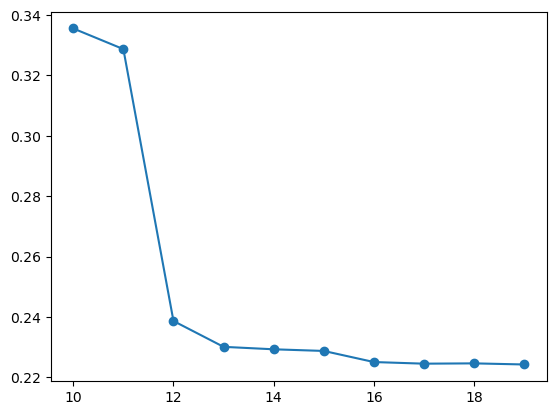

In [26]:
silhouette = []

for k in range(10,20):
    agglomerative = cluster.AgglomerativeClustering(n_clusters=k,linkage='single')
    agglomerative.fit(X_scaled)
    labels = agglomerative.fit_predict(X_scaled)
    silhouette.append(silhouette_score(X_scaled, labels))

import matplotlib.pyplot as plt

plt.plot(range(10,20), silhouette, marker = "o")

### Silhouette Score

In [27]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=10,linkage='single')
labels_single = agglomerative.fit_predict(X_scaled)
sil_score_agg_single = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for Agglomerative Single: {sil_score_agg_single}")

Silhouette Score for Agglomerative Single: 0.22426274419802883


### Davies-Bouldin Index

In [28]:
db_score_agg_single = davies_bouldin_score(X_scaled, labels_single)
print(f"Davies-Bouldin Index: {db_score_agg_single}")

Davies-Bouldin Index: 0.4910559222905406


### Calinski-Harabasz Index

In [29]:
ch_score_single = calinski_harabasz_score(X_scaled, labels_single)
print(f"Calinski-Harabasz Index: {ch_score_single}")

Calinski-Harabasz Index: 19.770989679214114


## DBSCAN

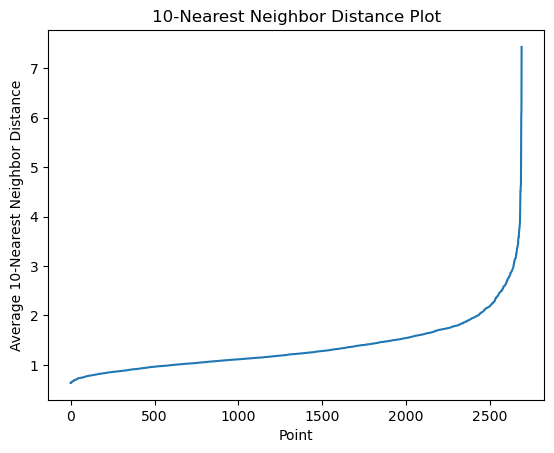

In [30]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

#find best eps:
# Compute the k-nearest neighbors for each point
k = 10  # Number of neighbors to consider
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
 
# Compute the average distance of the k-th nearest neighbor for each point
avg_distances = distances.mean(axis=1)
 
# Visualize the plot of k-nearest neighbors distance
plt.plot(sorted(avg_distances))
plt.xlabel('Point')
plt.ylabel(f'Average {k}-Nearest Neighbor Distance')
plt.title(f'{k}-Nearest Neighbor Distance Plot')
plt.show()

### Silhouette Score

In [31]:
#Find the best min_samples

from sklearn.metrics import silhouette_score
import numpy as np
 
# Optimal value for eps
eps = 2.3
 
# Range of values for min_samples to explore
min_samples_range = range(2, 10)

# Initialize a list to save silhouette scores
silhouette_scores = []
 
# Compute silhouette score for each min_samples value
for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    if len(np.unique(labels)) > 1:  # Ensure there are at least 2 clusters
        silhouette_avg = silhouette_score(X_scaled, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)  # Set a negative score if there's only one cluster
 
# Find the min_samples value with the maximum silhouette score
best_min_samples = min_samples_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)
 
print(f"The best value for min_samples is {best_min_samples} with a silhouette score of {best_silhouette_score}")

The best value for min_samples is 6 with a silhouette score of 0.15384120089717526


In [32]:
dbs = cluster.DBSCAN(eps=2.3, min_samples = 6)

pred = dbs.fit_predict(X_scaled)
pred

array([0, 0, 0, ..., 0, 0, 1])

In [33]:
pred= pd.DataFrame(pred)

In [34]:
pred.value_counts()

 0    2405
-1     159
 1      92
 2      35
Name: count, dtype: int64

### Davies-Bouldin Index

In [35]:
db_score_dbs = davies_bouldin_score(X_scaled, pred)
print(f"Davies-Bouldin Index: {db_score_dbs}")

Davies-Bouldin Index: 2.3618268816545482


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Calinski-Harabasz Index

In [36]:
ch_score_dbs = calinski_harabasz_score(X_scaled, pred)
print(f"Calinski-Harabasz Index: {ch_score_dbs}")

Calinski-Harabasz Index: 125.29682757059336


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## K-Means saving different models

In [52]:
kmeans_10 = KMeans(n_clusters = 10, random_state=0)
kmeans_10.fit(X_scaled)

KMeans(n_clusters=10, random_state=0)

In [53]:
# Save the model as a pickle file:
#with open('kmeans_10.pkl', 'wb') as file:
    #pickle.dump(kmeans_10, file)

In [54]:
kmeans_16 = KMeans(n_clusters = 16, random_state=0)
kmeans_16.fit(X_scaled)

KMeans(n_clusters=16, random_state=0)

In [55]:
#with open('kmeans_16.pkl', 'wb') as file:
    #pickle.dump(kmeans_16, file)

In [56]:
kmeans_18 = KMeans(n_clusters = 18, random_state=0)
kmeans_18.fit(X_scaled)

KMeans(n_clusters=18, random_state=0)

In [57]:
#with open('kmeans_18.pkl', 'wb') as file:
    #pickle.dump(kmeans_18, file)

In [58]:
kmeans_32 = KMeans(n_clusters = 32, random_state=0)
kmeans_32.fit(X_scaled)

KMeans(n_clusters=32, random_state=0)

In [59]:
#with open('kmeans_32.pkl', 'wb') as file:
    #pickle.dump(kmeans_32, file)

In [60]:
kmeans_11 = KMeans(n_clusters = 11, random_state=0)
kmeans_11.fit(X_scaled)

KMeans(n_clusters=11, random_state=0)

In [61]:
#with open('kmeans_11.pkl', 'wb') as file:
    #pickle.dump(kmeans_11, file)

In [64]:
kmeans_37 = KMeans(n_clusters = 37, random_state=0)
kmeans_37.fit(X_scaled)

KMeans(n_clusters=37, random_state=0)

In [65]:
#with open('kmeans_37.pkl', 'wb') as file:
    #pickle.dump(kmeans_37, file)

## K-Means Testing

In [100]:
pred = kmeans.predict(X_scaled)
pred = pd.DataFrame(pred)
pred

,0
0,5
1,3
2,3
3,3
4,3
...,...
2686,2
2687,2
2688,2
2689,2


In [101]:
X["cluster"] = pred
X

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.6110,0.3660,4,-10.890,0.2910,0.874,0.000515,0.0838,0.5930,146.052,158173,4,5
1,0.5120,0.5110,2,-8.645,0.0300,0.662,0.000199,0.2090,0.5890,89.499,179293,4,3
2,0.7970,0.3550,11,-14.592,0.0651,0.872,0.000057,0.0857,0.9610,87.574,118805,4,3
3,0.4260,0.2310,2,-16.066,0.0359,0.740,0.000000,0.1720,0.6670,177.980,122044,4,3
4,0.5080,0.2790,6,-15.586,0.0384,0.783,0.000000,0.1400,0.7280,83.261,116611,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,0.2400,0.0834,6,-29.545,0.0499,0.978,0.944000,0.0804,0.1880,169.621,159320,4,2
2687,0.4050,0.3180,9,-17.140,0.0565,0.938,0.723000,0.2840,0.3420,151.434,424653,4,2
2688,0.2910,0.0981,8,-23.156,0.0398,0.950,0.865000,0.2750,0.1940,138.168,249640,4,2
2689,0.0992,0.2260,9,-14.840,0.0339,0.937,0.903000,0.1830,0.0605,79.518,256493,4,2


In [102]:
X.groupby(["cluster"]).mean()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,
0,0.483109,0.767841,5.393182,-5.917880,0.064661,0.098097,0.020348,0.163122,0.426245,146.527036,2.446974e+05,3.922727
1,0.710216,0.722353,1.870909,-6.062027,0.063797,0.170509,0.017434,0.150753,0.690250,114.377733,2.118815e+05,3.996364
2,0.256430,0.115147,5.387283,-23.133266,0.044190,0.917272,0.736628,0.128795,0.166015,101.851659,3.686097e+05,3.745665
3,0.570618,0.389595,4.613333,-11.159509,0.047465,0.654919,0.025680,0.144712,0.476727,114.977702,2.291721e+05,3.900000
4,0.488944,0.393394,5.666667,-11.916889,0.094611,0.649094,0.210521,0.207094,0.396467,104.788556,3.062827e+05,0.944444
5,0.698086,0.679102,5.236735,-6.521804,0.295637,0.214407,0.007787,0.182492,0.562023,130.161837,2.134727e+05,3.991837
6,0.704556,0.732712,8.732448,-6.170455,0.067624,0.191913,0.010107,0.157005,0.698477,113.527078,2.148087e+05,3.990512
7,0.654532,0.830317,5.436508,-7.513079,0.071713,0.132091,0.733460,0.162066,0.346798,132.743381,2.652581e+05,3.984127
8,0.589058,0.712449,5.601449,-7.044739,0.097841,0.294791,0.035616,0.632101,0.584625,119.402551,2.285452e+05,3.992754
